<a href="https://colab.research.google.com/github/wooheehee/deeplearning-practice/blob/main/imdb_movie_review_sentiment_classification_using_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reference : https://www.tensorflow.org/tutorials/text/text_classification_rnn?hl=ko

# 라이브러리 import

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt

# 그래프 시각화 함수 정의

In [2]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

# IMDB Movie Review Dataset 다운로드 및 Sanity Check

In [3]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

encoder = info.features['text'].encoder
print('Vocabulary size: {}'.format(encoder.vocab_size))

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteQ8W99L/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteQ8W99L/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteQ8W99L/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.
Vocabulary size: 8185


In [4]:
sample_string = 'Hello TensorFlow.'

encoded_string = encoder.encode(sample_string)
print('Encoded string is {}'.format(encoded_string))

original_string = encoder.decode(encoded_string)
print('The original string: "{}"'.format(original_string))

Encoded string is [4025, 222, 6307, 2327, 4043, 2120, 7975]
The original string: "Hello TensorFlow."


In [5]:
assert original_string == sample_string

for index in encoded_string:
  print('{} ----> {}'.format(index, encoder.decode([index])))

4025 ----> Hell
222 ----> o 
6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
7975 ----> .


In [6]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [7]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_dataset.padded_batch(BATCH_SIZE)

In [8]:
for x, y in train_dataset.take(1):
  print(x)
  print(y)

tf.Tensor(
[[ 133 1265 3550 ...    0    0    0]
 [ 691  230 1194 ...    0    0    0]
 [  12  582   72 ...    0    0    0]
 ...
 [7963  133  894 ...    0    0    0]
 [6989 7961  131 ...    0    0    0]
 [ 597   39 7968 ...    0    0    0]], shape=(64, 1123), dtype=int64)
tf.Tensor(
[1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0
 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0], shape=(64,), dtype=int64)


# Sentiment Classification을 위한 Bidirectional RNN 구성

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [10]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 46s 90ms/step - loss: 0.6275 - accuracy: 0.5874 - val_loss: 0.4472 - val_accuracy: 0.8182
Epoch 2/10
391/391 [==============================] - 34s 85ms/step - loss: 0.3294 - accuracy: 0.8648 - val_loss: 0.3380 - val_accuracy: 0.8589
Epoch 3/10
391/391 [==============================] - 33s 85ms/step - loss: 0.2490 - accuracy: 0.9042 - val_loss: 0.3327 - val_accuracy: 0.8500
Epoch 4/10
391/391 [==============================] - 33s 84ms/step - loss: 0.2152 - accuracy: 0.9192 - val_loss: 0.3191 - val_accuracy: 0.8698
Epoch 5/10
391/391 [==============================] - 33s 85ms/step - loss: 0.1861 - accuracy: 0.9318 - val_loss: 0.3591 - val_accuracy: 0.8438
Epoch 6/10
391/391 [==============================] - 32s 82ms/step - loss: 0.1640 - accuracy: 0.9412 - val_loss: 0.3704 - val_accuracy: 0.8568
Epoch 7/10
391/391 [==============================] - 34s 85ms/step - loss: 0.1457 - accuracy: 0.9499 - val_loss: 0.3757 - val_accuracy:

In [11]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

391/391 [==============================] - 15s 39ms/step - loss: 0.4678 - accuracy: 0.8536
Test Loss: 0.4677928388118744
Test Accuracy: 0.8536400198936462


# 예측값이 > 0.5보다 크면 긍정리뷰, < 0.5면 부정리뷰로 판단합니다.

In [12]:
def sample_predict(sample_pred_text):
  encoded_sample_pred_text = encoder.encode(sample_pred_text)

  encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
  predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))

  return (predictions)

In [14]:
# predict on a sample text
sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text)
print(predictions)

1/1 [==============================] - 0s 20ms/step
[[-0.12616213]]


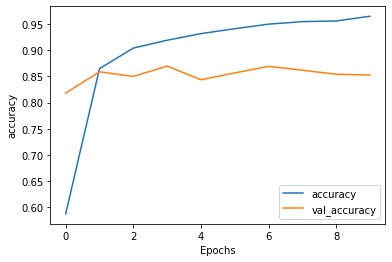

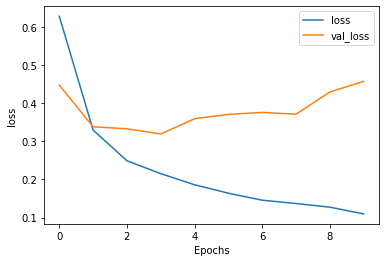

In [15]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [16]:
# Stack two or more LSTM layers
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [18]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 75s 175ms/step - loss: 0.0852 - accuracy: 0.9800 - val_loss: 0.5515 - val_accuracy: 0.8568
Epoch 2/10
391/391 [==============================] - 61s 156ms/step - loss: 0.0725 - accuracy: 0.9841 - val_loss: 0.5604 - val_accuracy: 0.8505
Epoch 3/10
391/391 [==============================] - 60s 154ms/step - loss: 0.0754 - accuracy: 0.9828 - val_loss: 0.5550 - val_accuracy: 0.8495
Epoch 4/10
391/391 [==============================] - 60s 152ms/step - loss: 0.0697 - accuracy: 0.9848 - val_loss: 0.6072 - val_accuracy: 0.8354
Epoch 5/10
391/391 [==============================] - 62s 158ms/step - loss: 0.0652 - accuracy: 0.9857 - val_loss: 0.5902 - val_accuracy: 0.8422
Epoch 6/10
391/391 [==============================] - 60s 153ms/step - loss: 0.0638 - accuracy: 0.9862 - val_loss: 0.6261 - val_accuracy: 0.8438
Epoch 7/10
391/391 [==============================] - 61s 154ms/step - loss: 0.0649 - accuracy: 0.9856 - val_loss: 0.6619 - val_ac

In [19]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

391/391 [==============================] - 26s 68ms/step - loss: 0.6996 - accuracy: 0.8406
Test Loss: 0.6996300220489502
Test Accuracy: 0.8406000137329102


In [20]:
# predict on a sample text
sample_pred_text = ('The movie was not good. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')
predictions = sample_predict(sample_pred_text)
print(predictions)

1/1 [==============================] - 1s 1s/step
[[-3.9653635]]


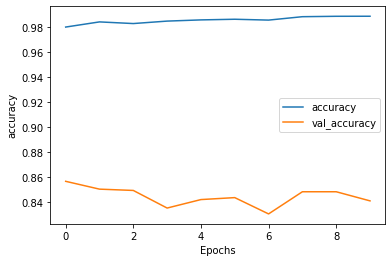

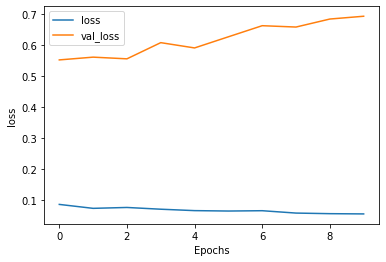

In [21]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')